In [1]:
!pip install plottable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image, circled_image, bar
from plottable.formatters import decimal_to_percent
import os
import matplotlib.image as mpimg
import json

In [4]:
# from google.colab import drive
# drive.mount(
#     '/content/drive'
# )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
teams = {
    "ANA": "Anaheim Ducks",
    "ARI": "Arizona Coyotes",
    "BOS": "Boston Bruins",
    "BUF": "Buffalo Sabres",
    "CGY": "Calgary Flames",
    "CAR": "Carolina Hurricanes",
    "CHI": "Chicago Blackhawks",
    "COL": "Colorado Avalanche",
    "CBJ": "Columbus Blue Jackets",
    "DAL": "Dallas Stars",
    "DET": "Detroit Red Wings",
    "EDM": "Edmonton Oilers",
    "FLA": "Florida Panthers",
    "LAK": "Los Angeles Kings",
    "MIN": "Minnesota Wild",
    "MTL": "Montreal Canadiens",
    "NSH": "Nashville Predators",
    "NJD": "New Jersey Devils",
    "NYI": "New York Islanders",
    "NYR": "New York Rangers",
    "OTT": "Ottawa Senators",
    "PHI": "Philadelphia Flyers",
    "PIT": "Pittsburgh Penguins",
    "SJS": "San Jose Sharks",
    "SEA": "Seattle Kraken",
    "STL": "St. Louis Blues",
    "TBL": "Tampa Bay Lightning",
    "TOR": "Toronto Maple Leafs",
    "VAN": "Vancouver Canucks",
    "VGK": "Vegas Golden Knights",
    "WSH": "Washington Capitals",
    "WPG": "Winnipeg Jets"
}
SUBREDDIT_MAPPING = {
    "AnaheimDucks": "ANA",
    "Coyotes": "ARI",
    "BostonBruins": "BOS",
    "sabres": "BUF",
    "CalgaryFlames": "CGY",
    "canes": "CAR",
    "hawks": "CHI",
    "ColoradoAvalanche": "COL",
    "BlueJackets": "CBJ",
    "DallasStars": "DAL",
    "DetroitRedWings": "DET",
    "EdmontonOilers": "EDM",
    "FloridaPanthers": "FLA",
    "losangeleskings": "LAK",
    "wildhockey": "MIN",
    "Habs": "MTL",
    "Predators": "NSH",
    "devils": "NJD",
    "NewYorkIslanders": "NYI",
    "rangers": "NYR",
    "OttawaSenators": "OTT",
    "Flyers": "PHI",
    "penguins": "PIT",
    "SanJoseSharks": "SJS",
    "SeattleKraken": "SEA",
    "stlouisblues": "STL",
    "TampaBayLightning": "TBL",
    "leafs": "TOR",
    "canucks": "VAN",
    "goldenknights": "VGK",
    "caps": "WSH",
    "winnipegjets": "WPG",
}

In [6]:
#json_file_path = '/content/drive/MyDrive/labelled_apr1_apr18_data.json'
apr1_apr18_comments = pd.read_json('labelled_apr1_apr18_data.json', lines = True)

In [7]:
apr1_apr18_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133951 entries, 0 to 133950
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   submission_id  133951 non-null  object        
 1   comment_id     133951 non-null  object        
 2   body           133951 non-null  object        
 3   score          133951 non-null  int64         
 4   date           133951 non-null  datetime64[ns]
 5   subreddit      133951 non-null  object        
 6   label          133951 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 7.2+ MB


In [8]:
apr1_apr18_comments['team'] = apr1_apr18_comments['subreddit'].map(SUBREDDIT_MAPPING)

In [9]:
apr1_apr18_comments['team'].value_counts()
apr1_apr18_comment_counts = apr1_apr18_comments['team'].value_counts().rename_axis('team').reset_index(name='comments')

In [10]:
# logo_directory = '/content/drive/MyDrive/nhl-logos'
# apr1_apr18_comment_counts['logo'] = apr1_apr18_comment_counts['team'].apply(
#         lambda x:
#     f"{logo_directory}/{x}_logo.png"
#     )

In [11]:
apr1_apr18_comment_counts.index += 1

apr1_apr18_comment_counts['rank'] = apr1_apr18_comment_counts.index

In [12]:
apr1_apr18_comment_counts['team'] = apr1_apr18_comment_counts['team'].map(teams)

In [13]:
apr1_apr18_comment_counts = apr1_apr18_comment_counts[['rank', 'logo', 'team', 'comments']]

In [14]:
apr1_apr18_comment_counts

,rank,logo,team,comments
1,1,/content/drive/MyDrive/nhl-logos/DET_logo.png,Detroit Red Wings,11208
2,2,/content/drive/MyDrive/nhl-logos/VAN_logo.png,Vancouver Canucks,8836
3,3,/content/drive/MyDrive/nhl-logos/EDM_logo.png,Edmonton Oilers,8256
4,4,/content/drive/MyDrive/nhl-logos/TOR_logo.png,Toronto Maple Leafs,6595
5,5,/content/drive/MyDrive/nhl-logos/COL_logo.png,Colorado Avalanche,5737
6,6,/content/drive/MyDrive/nhl-logos/NYR_logo.png,New York Rangers,5715
7,7,/content/drive/MyDrive/nhl-logos/PHI_logo.png,Philadelphia Flyers,5141
8,8,/content/drive/MyDrive/nhl-logos/WPG_logo.png,Winnipeg Jets,5126
9,9,/content/drive/MyDrive/nhl-logos/MTL_logo.png,Montreal Canadiens,4827
10,10,/content/drive/MyDrive/nhl-logos/TBL_logo.png,Tampa Bay Lightning,4627


In [15]:
top_5_apr1_apr18_comment_counts = apr1_apr18_comment_counts.head(5)

In [16]:
bottom_5_apr1_apr18_comment_counts = apr1_apr18_comment_counts.tail(5)

In [17]:
bg_color = "#1f2424"
text_color = "#FFFFFF"

row_colors = {"#91C465", "D0F0C0", "F0FFF0", "F5FFFA"}

plt.rcParams['text.color'] = text_color
plt.rcParams['font.family'] = "monospace"


In [18]:
col_defs = [
    ColumnDefinition(
        name = "rank",
        title = "Rank",
        textprops = {"ha": "center", "weight":"bold"},
        width = 0.15
    ),
    ColumnDefinition(
        name = "logo",
        title = "Team",
        textprops = {"ha": "center", "va":"center", "weight":"bold", "color": text_color},
        width = 0.20,
        plot_fn = image
    ),
    ColumnDefinition(
        name = "team",
        title = "",
        textprops = {"ha": "left", "va":"center", "weight":"bold", "color": text_color},
        width = 0.20,
    ),
    ColumnDefinition(
            name="comments",
            title = "Comments",
            width=0.50,
            textprops={
                "ha": "center",
                "weight": "bold",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(top_5_apr1_apr18_comment_counts["comments"], cmap=plt.cm.PiYG, num_stds=2.5),
    )
]

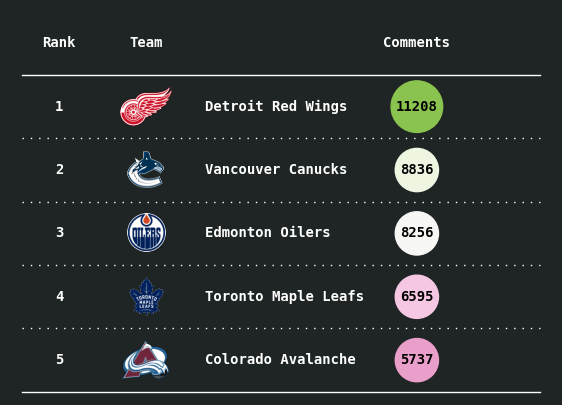

In [19]:
fig, ax = plt.subplots(figsize=(7, 5))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    top_5_apr1_apr18_comment_counts,
    column_definitions = col_defs,
    index_col = "rank",
    row_dividers = True,
    row_divider_kw = {"linewidth":1.0, "linestyle": (0, (1,5))},
    footer_divider = True,
    textprops = {"fontsize":10},
    ax = ax
).autoset_fontcolors(colnames=["comments"])

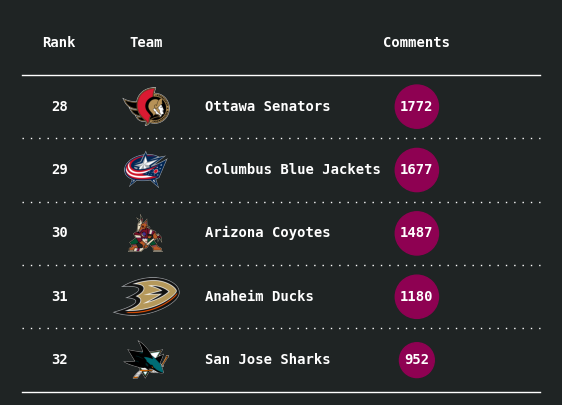

In [20]:
fig, ax = plt.subplots(figsize=(7, 5))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    bottom_5_apr1_apr18_comment_counts,
    column_definitions = col_defs,
    index_col = "rank",
    row_dividers = True,
    row_divider_kw = {"linewidth":1.0, "linestyle": (0, (1,5))},
    footer_divider = True,
    textprops = {"fontsize":10},
    ax = ax
).autoset_fontcolors(colnames=["comments"])

In [4]:
# Overall Positivity Scores
# feb1_feb15_pos_scores_fp = '/content/drive/MyDrive/positivity_scores/pos_scores_feb1_feb15.json'
# feb16_feb29_pos_scores_fp = '/content/drive/MyDrive/positivity_scores/pos_scores_feb16_feb29.json'
# mar1_mar15_pos_scores_fp = '/content/drive/MyDrive/positivity_scores/pos_scores_mar1_mar15.json'
# mar16_mar31_pos_scores_fp = '/content/drive/MyDrive/positivity_scores/pos_scores_mar16_mar31.json'
# apr1_apr18_pos_scores_fp = '/content/drive/MyDrive/positivity_scores/pos_scores_apr1_apr18.json'

feb1_feb15_pos_scores_fp = 'pos_scores_feb1_feb15.json'
feb16_feb29_pos_scores_fp = 'pos_scores_feb16_feb29.json'
mar1_mar15_pos_scores_fp = 'pos_scores_mar1_mar15.json'
mar16_mar31_pos_scores_fp = 'pos_scores_mar16_mar31.json'
apr1_apr18_pos_scores_fp = 'pos_scores_apr1_apr18.json'

with open(feb1_feb15_pos_scores_fp) as file:
  feb1_feb15_pos_scores = json.load(file)

with open(feb16_feb29_pos_scores_fp) as file:
  feb16_feb29_pos_scores = json.load(file)

with open(mar1_mar15_pos_scores_fp) as file:
  mar1_mar15_pos_scores = json.load(file)

with open(mar16_mar31_pos_scores_fp) as file:
  mar16_mar31_pos_scores = json.load(file)

with open(apr1_apr18_pos_scores_fp) as file:
  apr1_apr18_pos_scores = json.load(file)


In [5]:
feb1_feb15_pos_scores = pd.DataFrame(list(feb1_feb15_pos_scores.items()), columns = ['Team', 'pos_score'])
feb16_feb29_pos_scores = pd.DataFrame(list(feb16_feb29_pos_scores.items()), columns = ['Team', 'pos_score'])
mar1_mar15_pos_scores = pd.DataFrame(list(mar1_mar15_pos_scores.items()), columns = ['Team', 'pos_score'])
mar16_mar31_pos_scores = pd.DataFrame(list(mar16_mar31_pos_scores.items()), columns = ['Team', 'pos_score'])
apr1_apr18_pos_scores = pd.DataFrame(list(apr1_apr18_pos_scores.items()), columns = ['Team', 'pos_score'])


In [6]:
all_pos_scores = pd.concat([feb1_feb15_pos_scores, feb16_feb29_pos_scores, mar1_mar15_pos_scores, mar16_mar31_pos_scores, apr1_apr18_pos_scores])

In [7]:
average_pos_score = all_pos_scores.groupby(by = 'Team').mean()

In [8]:
average_pos_score = average_pos_score.reset_index()


In [26]:
# logo_directory = '/content/drive/MyDrive/nhl-logos'

In [9]:
average_pos_score

,Team,pos_score
0,ANA,-0.443911
1,ARI,0.358729
2,BOS,0.349821
3,BUF,-0.540147
4,CAR,-0.180703
5,CBJ,-0.300727
6,CGY,1.126514
7,CHI,0.253812
8,COL,0.338593
9,DAL,0.888351


In [28]:
average_pos_score['logo'] = average_pos_score['Team'].apply(
        lambda x:
    f"{logo_directory}/{x}_logo.png"
    )

In [29]:
average_pos_score = average_pos_score.sort_values(by = 'pos_score', ascending = False)

average_pos_score = average_pos_score.reset_index(drop = True)

average_pos_score.index += 1

average_pos_score['rank'] = average_pos_score.index

In [30]:
average_pos_score = average_pos_score[['rank', 'logo', 'Team', 'pos_score']]

In [31]:
bg_color = "#1f2424"
text_color = "#FFFFFF"

row_colors = {"#91C465", "D0F0C0", "F0FFF0", "F5FFFA"}

plt.rcParams['text.color'] = text_color
plt.rcParams['font.family'] = "monospace"
cmap = normed_cmap(average_pos_score["pos_score"], cmap = plt.cm.PiYG, num_stds = 2.5)

In [32]:
def plot_positivity_bar(ax, val, height, cmap, width = 0.1):
    """Plots TAA bar on the plottable table

    Args:
        ax : matplotlib axis
        val (float): value to be plotted
        height : height of bar
        cmap : matplotlib color map
        width (float, optional): width of bar Defaults to 0.5.
    """
    color = cmap(val)
    ax.barh(y=[0], width=[val], color=color, height=height)
    ax.set_xlim(-2, 2)
    ax.axis('off')
    ax.text(val + 0.05 if val >= 0 else val - 0.05, 0, f'{val:.2f}',
            va='center', ha='right' if val < 0 else 'left', fontsize=16, fontweight='bold')

In [33]:
col_defs = [
    ColumnDefinition(
        name = "rank",
        title = "Rank",
        textprops = {"ha": "center", "weight":"bold"},
        width = 0.1
    ),
    ColumnDefinition(
        name = "logo",
        title = "Team",
        textprops = {"ha": "center", "va":"center", "weight":"bold", "color": text_color},
        width = 0.1,
        plot_fn = image
    ),
    ColumnDefinition(
        name = "Team",
        title = "",
        textprops = {"ha": "left", "va":"center", "weight":"bold", "color": text_color},
        width = 0.40,
    ),
    ColumnDefinition(
        name = "pos_score",
        title = "Positivity Score",
        textprops = {"ha": "right", "va":"center", "weight":"bold", "color": text_color},
        width = 1.25,
        plot_fn = plot_positivity_bar,
        plot_kw = {
            "height": 0.5,
            "cmap": cmap
        }
    )
]

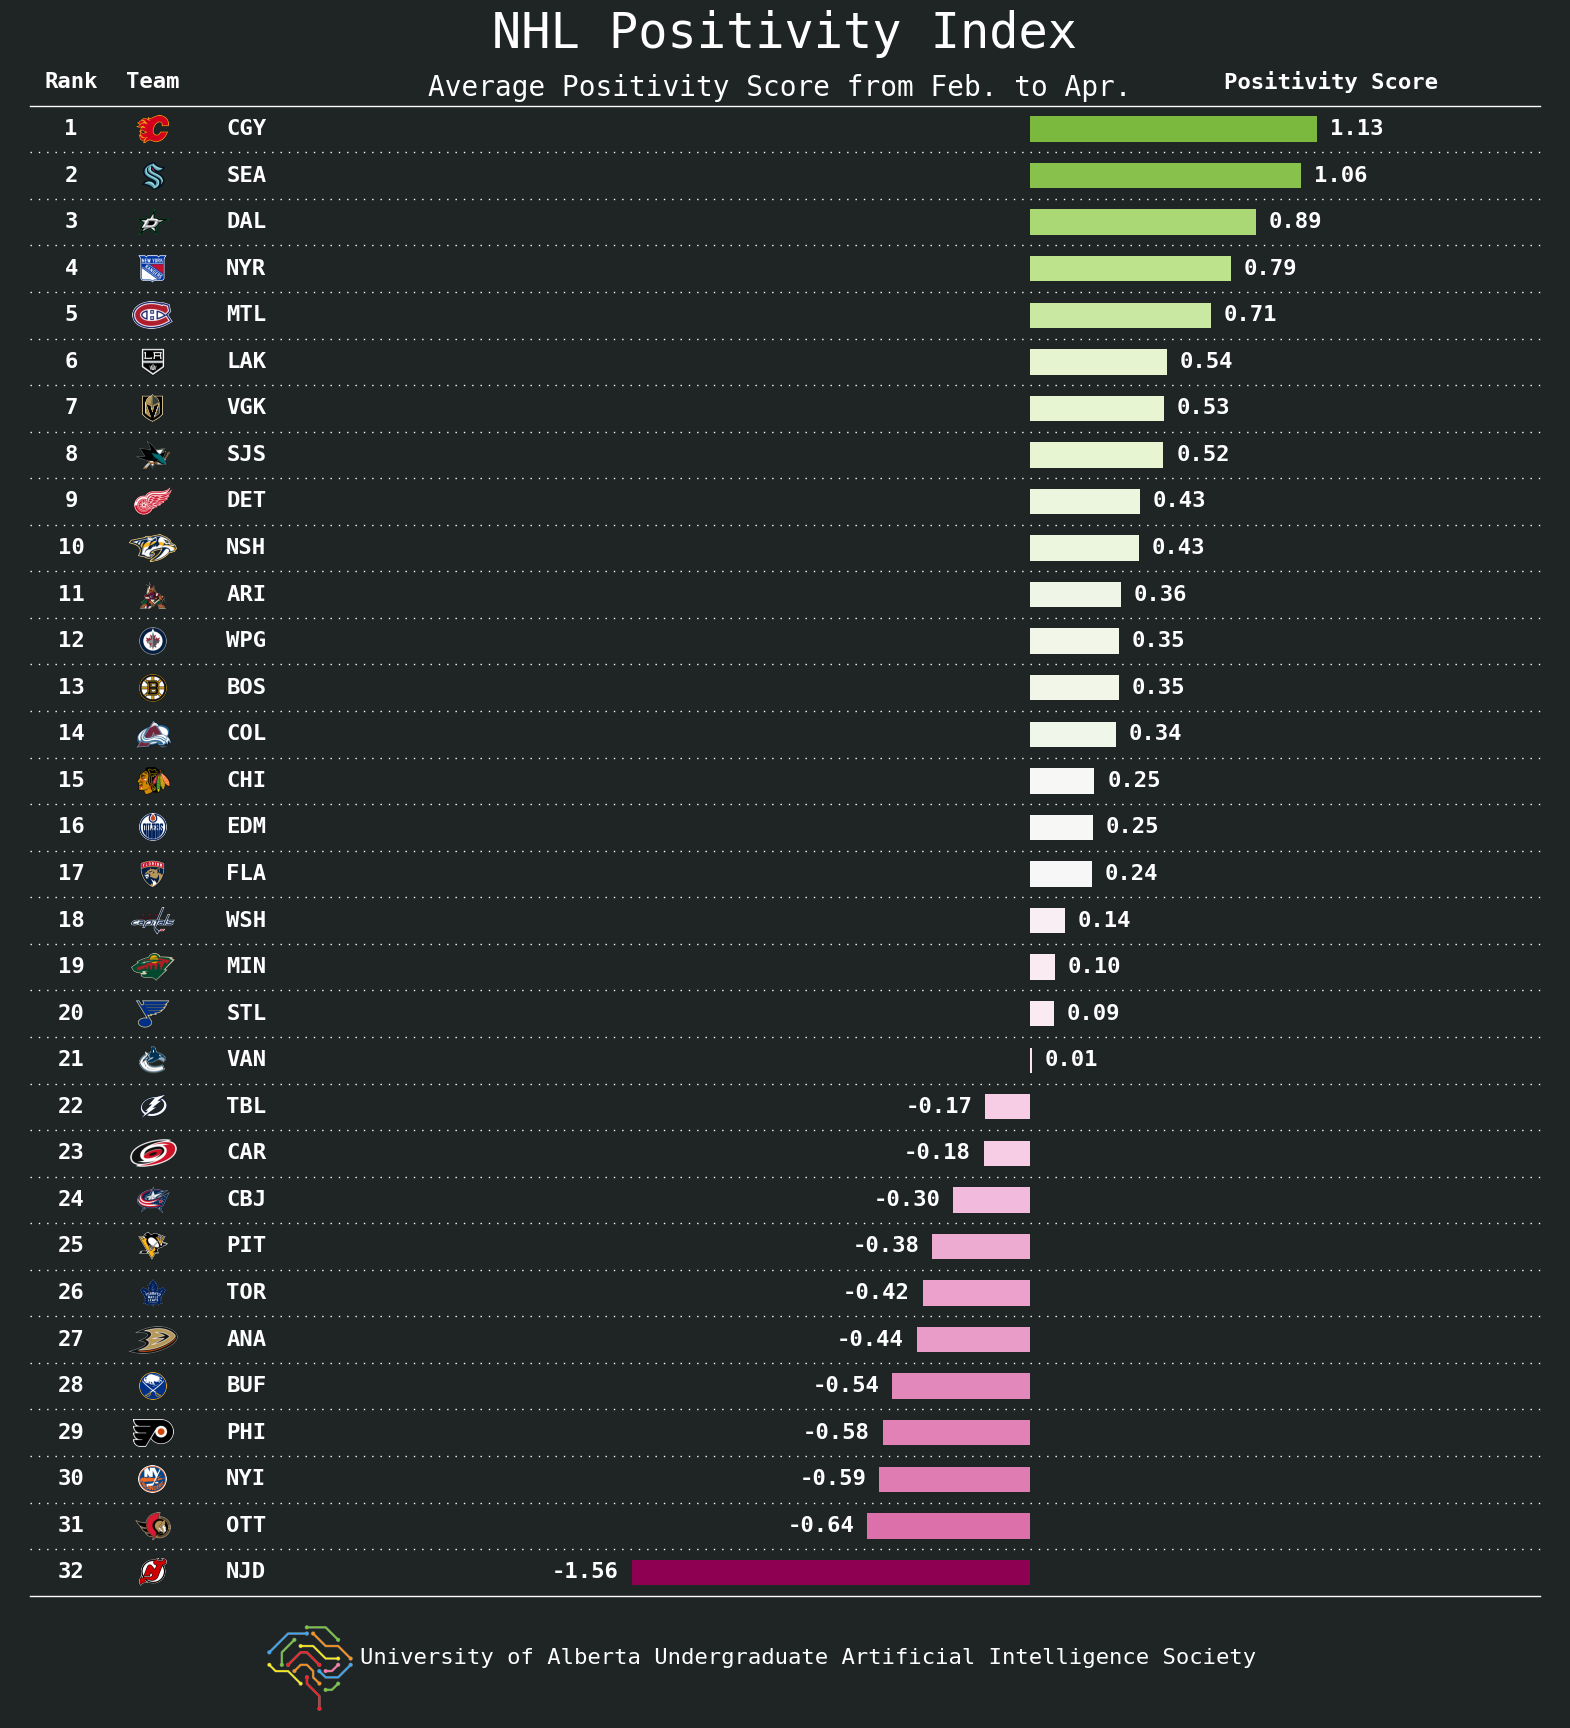

In [34]:
#Social Media Dashboard
fig, ax = plt.subplots(figsize=(20, 20))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    average_pos_score,
    column_definitions = col_defs,
    index_col = "rank",
    row_dividers = True,
    row_divider_kw = {"linewidth":1.0, "linestyle": (0, (1,5))},
    footer_divider = True,
    textprops = {"fontsize":16},
    ax = ax
).autoset_fontcolors(colnames=["pos_score"])

ax.set_title('NHL Positivity Index', fontsize=35)
subtitle_x = 0.51
subtitle_y = 0.865
subtitle_text = 'Average Positivity Score from Feb. to Apr.'
fig.text(subtitle_x, subtitle_y, subtitle_text, fontsize=20, va='center', ha='center', transform=fig.transFigure)
uais_logo = mpimg.imread('/content/drive/Shareddrives/UAIS Executive Team/media/Logo/small_logo_color@0.5x.png')
uais_logo_ax = fig.add_axes([0.20, 0.05, 0.15, 0.05])
uais_logo_ax.axis('off')
uais_logo_ax.imshow(uais_logo)
text_x = 0.30
text_y = 0.08
fig.text(text_x, text_y, 'University of Alberta Undergraduate Artificial Intelligence Society', fontsize=16, va='center', ha='left')
save_path = '/content/drive/MyDrive/feb_apr_avg_pos_scores.png'
fig.savefig(save_path, dpi=100, bbox_inches='tight')

In [10]:
# Oilers Positivity Score
oil_feb1_feb15_pos_score = feb1_feb15_pos_scores[feb1_feb15_pos_scores['Team'] == 'EDM']
oil_feb16_feb29_pos_score = feb16_feb29_pos_scores[feb16_feb29_pos_scores['Team'] == 'EDM']
oil_mar1_mar15_pos_score = mar1_mar15_pos_scores[mar1_mar15_pos_scores['Team'] == 'EDM']
oil_mar16_mar31_pos_score = mar16_mar31_pos_scores[mar16_mar31_pos_scores['Team'] == 'EDM']
oil_apr1_apr18_pos_score = apr1_apr18_pos_scores[apr1_apr18_pos_scores['Team'] == 'EDM']



In [11]:
oil_feb1_feb15_pos_score['time_period'] = 'feb1_feb15'
oil_feb16_feb29_pos_score['time_period'] = 'feb16_feb29'
oil_mar1_mar15_pos_score['time_period'] = 'mar1_mar15'
oil_mar16_mar31_pos_score['time_period'] = 'mar16_mar31'
oil_apr1_apr18_pos_score['time_period'] = 'apr1_apr18'

C:\Users\winch\AppData\Local\Temp\ipykernel_40608\4160098415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_feb1_feb15_pos_score['time_period'] = 'feb1_feb15'
C:\Users\winch\AppData\Local\Temp\ipykernel_40608\4160098415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_feb16_feb29_pos_score['time_period'] = 'feb16_feb29'
C:\Users\winch\AppData\Local\Temp\ipykernel_40608\4160098415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [12]:
oil_pos_scores = pd.concat([oil_feb1_feb15_pos_score, oil_feb16_feb29_pos_score, oil_mar1_mar15_pos_score, oil_mar16_mar31_pos_score, oil_apr1_apr18_pos_score])

In [13]:
oil_pos_scores.to_csv("oilers_pos_scores_feb_apr.csv")

In [16]:
# Does Number of comments affect score
# json_file_path = '/content/drive/MyDrive/labelled_feb1_to_feb15_data.json'
# feb1_feb15_comments = pd.read_json(json_file_path, lines = True)

# json_file_path = '/content/drive/MyDrive/labelled_feb16_feb29_data.json'
# feb16_feb29_comments = pd.read_json(json_file_path, lines = True)

# json_file_path = '/content/drive/MyDrive/labelled_mar1_mar15_data.json'
# mar1_mar15_comments = pd.read_json(json_file_path, lines = True)

# json_file_path = '/content/drive/MyDrive/labelled_mar16_mar31_data.json'
# mar16_mar29_comments = pd.read_json(json_file_path, lines = True)

# json_file_path = '/content/drive/MyDrive/labelled_apr1_apr18_data.json'
# apr1_apr18_comments = pd.read_json(json_file_path, lines = True)
json_file_path = 'labelled_feb1_to_feb15_data.json'
feb1_feb15_comments = pd.read_json(json_file_path, lines = True)

json_file_path = 'labelled_feb16_feb29_data.json'
feb16_feb29_comments = pd.read_json(json_file_path, lines = True)

json_file_path = 'labelled_mar1_mar15_data.json'
mar1_mar15_comments = pd.read_json(json_file_path, lines = True)

json_file_path = 'labelled_mar16_mar31_data.json'
mar16_mar29_comments = pd.read_json(json_file_path, lines = True)

json_file_path = 'labelled_apr1_apr18_data.json'
apr1_apr18_comments = pd.read_json(json_file_path, lines = True)



In [17]:
all_comments = pd.concat([feb1_feb15_comments, feb16_feb29_comments, mar1_mar15_comments, mar16_mar29_comments, apr1_apr18_comments])

In [18]:
all_comments['team'] = all_comments['subreddit'].map(SUBREDDIT_MAPPING)

In [19]:
all_comments['team'].value_counts()
all_comments = all_comments['team'].value_counts().rename_axis('team').reset_index(name='comments')

In [20]:
all_comments = all_comments.rename(columns = {'team':'Team'})

In [21]:
all_comments

,Team,comments
0,DET,42308
1,VAN,35978
2,EDM,33909
3,TOR,26277
4,PHI,25580
5,NYR,25039
6,NJD,24475
7,WPG,24277
8,COL,22737
9,BOS,20345


In [22]:
average_pos_score

,Team,pos_score
0,ANA,-0.443911
1,ARI,0.358729
2,BOS,0.349821
3,BUF,-0.540147
4,CAR,-0.180703
5,CBJ,-0.300727
6,CGY,1.126514
7,CHI,0.253812
8,COL,0.338593
9,DAL,0.888351


In [23]:
all_comments = pd.merge(all_comments, average_pos_score, on = "Team", how = "inner")

In [24]:
all_comments.to_csv('total_comment_numbers_avg_pos_score.csv')

In [26]:
# feb1_feb15_games_path = '/content/drive/MyDrive/feb1_feb15_games.xls'
# feb16_feb29_games_path = '/content/drive/MyDrive/feb16_feb29_games.xls'
# mar1_mar15_games_path = '/content/drive/MyDrive/mar1_mar15_games.xls'
# mar16_mar31_games_path_1 = '/content/drive/MyDrive/mar16_mar31_games_1.xls'
# mar16_mar31_games_path_2 = '/content/drive/MyDrive/mar16_mar31_games_2.xls'
# apr1_apr18_games_path_1 = '/content/drive/MyDrive/apr1_apr18_games_1.xls'
# apr1_apr18_games_path_2 = '/content/drive/MyDrive/apr1_apr18_games_2.xls'
feb1_feb15_games_path = 'feb1_feb15_games.xls'
feb16_feb29_games_path = 'feb16_feb29_games.xls'
mar1_mar15_games_path = 'mar1_mar15_games.xls'
mar16_mar31_games_path_1 = 'mar16_mar31_games_1.xls'
mar16_mar31_games_path_2 = 'mar16_mar31_games_2.xls'
apr1_apr18_games_path_1 = 'apr1_apr18_games_1.xls'
apr1_apr18_games_path_2 = 'apr1_apr18_games_2.xls'

In [30]:
feb1_feb15_games = pd.read_html(feb1_feb15_games_path)[0]
feb16_feb29_games = pd.read_html(feb16_feb29_games_path)[0]
mar1_mar15_games = pd.read_html(mar1_mar15_games_path)[0]
mar16_mar31_games_1 = pd.read_html(mar16_mar31_games_path_1)[0]
mar16_mar31_games_2 = pd.read_html(mar16_mar31_games_path_2)[0]
apr1_apr18_games_1 = pd.read_html(apr1_apr18_games_path_1)[0]
apr1_apr18_games_2 = pd.read_html(apr1_apr18_games_path_2)[0]

In [31]:
new_columns = []
for col in feb1_feb15_games.columns:
    if "Unnamed" in col[0]:
        new_columns.append(col[1])
    else:
        new_columns.append(f"{col[0]}_{col[1]}")
feb1_feb15_games.columns = new_columns

In [32]:
new_columns = []
for col in feb16_feb29_games.columns:
    if "Unnamed" in col[0]:
        new_columns.append(col[1])
    else:
        new_columns.append(f"{col[0]}_{col[1]}")
feb16_feb29_games.columns = new_columns

new_columns = []
for col in mar1_mar15_games.columns:
    if "Unnamed" in col[0]:
        new_columns.append(col[1])
    else:
        new_columns.append(f"{col[0]}_{col[1]}")
mar1_mar15_games.columns = new_columns

In [33]:
new_columns = []
for col in mar16_mar31_games_1.columns:
    if "Unnamed" in col[0]:
        new_columns.append(col[1])
    else:
        new_columns.append(f"{col[0]}_{col[1]}")
mar16_mar31_games_1.columns = new_columns

In [34]:
new_columns = []
for col in mar16_mar31_games_2.columns:
    if "Unnamed" in col[0]:
        new_columns.append(col[1])
    else:
        new_columns.append(f"{col[0]}_{col[1]}")
mar16_mar31_games_2.columns = new_columns

In [35]:
new_columns = []
for col in apr1_apr18_games_1.columns:
    if "Unnamed" in col[0]:
        new_columns.append(col[1])
    else:
        new_columns.append(f"{col[0]}_{col[1]}")
apr1_apr18_games_1.columns = new_columns

new_columns = []
for col in apr1_apr18_games_2.columns:
    if "Unnamed" in col[0]:
        new_columns.append(col[1])
    else:
        new_columns.append(f"{col[0]}_{col[1]}")
apr1_apr18_games_2.columns = new_columns

In [36]:
mar16_mar31_games = pd.concat([mar16_mar31_games_1, mar16_mar31_games_2])

In [37]:
apr1_apr18_games = pd.concat([apr1_apr18_games_1, apr1_apr18_games_2])

In [38]:
feb1_feb15_summaries = feb1_feb15_games.groupby('Team')[['GP', 'W', 'L', 'T', 'OTL']].sum().reset_index()

In [39]:
feb1_feb15_summaries['PTS'] = feb1_feb15_summaries['W'] * 2 + feb1_feb15_summaries['OTL']*1
feb1_feb15_summaries['P%'] = feb1_feb15_summaries['PTS'] / (feb1_feb15_summaries['GP']*2)

In [40]:
feb16_feb29_summaries = feb16_feb29_games.groupby('Team')[['GP', 'W', 'L', 'T', 'OTL']].sum().reset_index()
feb16_feb29_summaries['PTS'] = feb16_feb29_summaries['W'] * 2 + feb16_feb29_summaries['OTL']*1
feb16_feb29_summaries['P%'] = feb16_feb29_summaries['PTS'] / (feb16_feb29_summaries['GP']*2)

mar1_mar15_summaries = mar1_mar15_games.groupby('Team')[['GP', 'W', 'L', 'T', 'OTL']].sum().reset_index()
mar1_mar15_summaries['PTS'] = mar1_mar15_summaries['W'] * 2 + mar1_mar15_summaries['OTL']*1
mar1_mar15_summaries['P%'] = mar1_mar15_summaries['PTS'] / (mar1_mar15_summaries['GP']*2)

In [41]:
mar16_mar31_summaries = mar16_mar31_games.groupby('Team')[['GP', 'W', 'L', 'T', 'OTL']].sum().reset_index()
mar16_mar31_summaries['PTS'] = mar16_mar31_summaries['W'] * 2 + mar16_mar31_summaries['OTL']*1
mar16_mar31_summaries['P%'] = mar16_mar31_summaries['PTS'] / (mar16_mar31_summaries['GP']*2)

apr1_apr18_summaries = apr1_apr18_games.groupby('Team')[['GP', 'W', 'L', 'T', 'OTL']].sum().reset_index()
apr1_apr18_summaries['PTS'] = apr1_apr18_summaries['W'] * 2 + apr1_apr18_summaries['OTL']*1
apr1_apr18_summaries['P%'] = apr1_apr18_summaries['PTS'] / (apr1_apr18_summaries['GP']*2)

In [45]:
# feb1_feb15_pos_scores_fp = '/content/drive/MyDrive/team_pos_scores_feb1_to_feb15_data.json'
# feb16_feb29_pos_scores_fp = '/content/drive/MyDrive/positivity_scores/pos_scores_feb16_feb29.json'
# mar1_mar15_pos_scores_fp = '/content/drive/MyDrive/positivity_scores/pos_scores_mar1_mar15.json'
# mar16_mar31_pos_scores_fp = '/content/drive/MyDrive/positivity_scores/pos_scores_mar16_mar31.json'
# apr1_apr18_pos_scores_fp = '/content/drive/MyDrive/positivity_scores/pos_scores_apr1_apr18.json'

feb1_feb15_pos_scores_fp = 'pos_scores_feb1_feb15.json'
feb16_feb29_pos_scores_fp = 'pos_scores_feb16_feb29.json'
mar1_mar15_pos_scores_fp = 'pos_scores_mar1_mar15.json'
mar16_mar31_pos_scores_fp = 'pos_scores_mar16_mar31.json'
apr1_apr18_pos_scores_fp = 'pos_scores_apr1_apr18.json'


with open(feb1_feb15_pos_scores_fp) as file:
  feb1_feb15_pos_scores = json.load(file)

with open(feb16_feb29_pos_scores_fp) as file:
  feb16_feb29_pos_scores = json.load(file)

with open(mar1_mar15_pos_scores_fp) as file:
  mar1_mar15_pos_scores = json.load(file)

with open(mar16_mar31_pos_scores_fp) as file:
  mar16_mar31_pos_scores = json.load(file)

with open(apr1_apr18_pos_scores_fp) as file:
  apr1_apr18_pos_scores = json.load(file)

In [47]:
feb1_feb15_pos_scores = pd.DataFrame(list(feb1_feb15_pos_scores.items()), columns = ['Team', 'pos_score'])

In [48]:
feb16_feb29_pos_scores = pd.DataFrame(list(feb16_feb29_pos_scores.items()), columns = ['Team', 'pos_score'])

In [49]:
mar1_mar15_pos_scores = pd.DataFrame(list(mar1_mar15_pos_scores.items()), columns = ['Team', 'pos_score'])

In [50]:
mar16_mar31_pos_scores = pd.DataFrame(list(mar16_mar31_pos_scores.items()), columns = ['Team', 'pos_score'])
apr1_apr18_pos_scores = pd.DataFrame(list(apr1_apr18_pos_scores.items()), columns = ['Team', 'pos_score'])

In [51]:
feb1_feb15 = pd.merge(feb1_feb15_summaries, feb1_feb15_pos_scores, on= 'Team', how = 'inner')

In [52]:
feb16_feb29 = pd.merge(feb16_feb29_summaries, feb16_feb29_pos_scores, on= 'Team', how = 'inner')
mar1_mar15 = pd.merge(mar1_mar15_summaries, mar1_mar15_pos_scores, on= 'Team', how = 'inner')

In [53]:
mar16_mar31 = pd.merge(mar16_mar31_summaries, mar16_mar31_pos_scores, on= 'Team', how = 'inner')
apr1_apr18 = pd.merge(apr1_apr18_summaries, apr1_apr18_pos_scores, on= 'Team', how = 'inner')

In [54]:
feb1_feb15

,Team,GP,W,L,T,OTL,PTS,P%,pos_score
0,ANA,3,1,2,0,0,2,0.333333,-0.679715
1,ARI,4,0,3,0,1,1,0.125000,-1.363363
2,BOS,5,1,3,0,1,3,0.300000,-0.690977
3,BUF,4,1,3,0,0,2,0.250000,-1.044804
4,CAR,4,2,2,0,0,4,0.500000,-0.752015
5,CBJ,2,0,2,0,0,0,0.000000,-1.480717
6,CGY,5,3,2,0,0,6,0.600000,2.430410
7,CHI,4,0,3,0,1,1,0.125000,0.012170
8,COL,6,1,4,0,1,3,0.250000,-0.647262
9,DAL,5,4,1,0,0,8,0.800000,0.503758


In [55]:
feb1_feb15 = feb1_feb15[['Team', 'PTS', 'P%', 'pos_score']]
feb16_feb29 = feb16_feb29[['Team', 'PTS', 'P%', 'pos_score']]
mar1_mar15 = mar1_mar15[['Team', 'PTS', 'P%', 'pos_score']]
mar16_mar31 = mar16_mar31[['Team', 'PTS', 'P%', 'pos_score']]
apr1_apr18 = apr1_apr18[['Team', 'PTS', 'P%', 'pos_score']]

In [56]:
feb1_feb15_oil = feb1_feb15[feb1_feb15['Team'] == 'EDM']
feb16_feb29_oil = feb16_feb29[feb16_feb29['Team'] == 'EDM']
mar1_mar15_oil = mar1_mar15[mar1_mar15['Team'] == 'EDM']
mar16_mar31_oil = mar16_mar31[mar16_mar31['Team'] == 'EDM']
apr1_apr18_oil = apr1_apr18[apr1_apr18['Team'] == 'EDM']

In [57]:
pts_pos_df = pd.concat([feb1_feb15, feb16_feb29, mar1_mar15, mar16_mar31, apr1_apr18])

In [58]:
oil_pts_pos_df = pd.concat([feb1_feb15_oil, feb16_feb29_oil, mar1_mar15_oil, mar16_mar31_oil, apr1_apr18_oil])

In [59]:
pts_pos_df.to_csv("pts_pos_df.csv")

In [60]:
oil_pts_pos_df.to_csv("oil_pts_pos_df.csv")

In [61]:
oil_pts_pos_df

,Team,PTS,P%,pos_score
11,EDM,4.0,0.400000,-0.675297
11,EDM,9.0,0.642857,-0.193156
11,EDM,11.0,0.785714,1.562988
11,EDM,11.0,0.687500,0.582741
11,EDM,10.0,0.500000,-0.040304


In [66]:
df = pd.read_csv('total_comment_numbers_avg_pos_score.csv')

In [67]:
df['logo'] = df['Team'].apply(
        lambda x:
    f"nhl-logos/{x}_logo.png"
    )

In [70]:
df.to_csv('total_comment_numbers_avg_pos_score_with_logos.csv')